## Bike Sharing Assignment
### Kishor Kunal | DS27


### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

### Data understanding, preparation and EDA

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.isnull().sum() # No null value found

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike.isna().sum() # No missing value found

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
#renaming columns
bike.rename(columns={'dteday':'date','yr':'year','mnth':'month','atemp':'feeling_temp','hum':'humidity','cnt':'count','weathersit':'weather_situation'},inplace=True)
bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
bike[['humidity','windspeed','feeling_temp','temp','count']].corr()

,humidity,windspeed,feeling_temp,temp,count
humidity,1.000000,-0.248506,0.141512,0.128565,-0.098543
windspeed,-0.248506,1.000000,-0.183876,-0.158186,-0.235132
feeling_temp,0.141512,-0.183876,1.000000,0.991696,0.630685
temp,0.128565,-0.158186,0.991696,1.000000,0.627044
count,-0.098543,-0.235132,0.630685,0.627044,1.000000


In [10]:
# dropping not required columns

# instant - not required
# casual and registered - as we've to refer to count column
# holiday- we can refer to working day instead of this
# temp - will be referring to feeling temp as it has a better correlation to count

bike.drop(['instant','casual','registered','temp','holiday'],inplace=True,axis=1)
bike.head()

,date,season,year,month,weekday,workingday,weather_situation,feeling_temp,humidity,windspeed,count
0,01-01-2018,1,0,1,1,1,2,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,2,1,2,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,3,1,1,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,4,1,1,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,5,1,1,11.46350,43.6957,12.522300,1600


#### Encoding columns for Visulaisation

In [11]:
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.year = bike.year.map({0:2018, 1:2019})
bike.weather_situation = bike.weather_situation.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
bike.workingday = bike.workingday.map({0:'Holiday', 1:'Working'})
bike.month=bike.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike.weekday=bike.weekday.map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
bike.head()

,date,season,year,month,weekday,workingday,weather_situation,feeling_temp,humidity,windspeed,count
0,01-01-2018,spring,2018,Jan,Tue,Working,Mist,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,Jan,Wed,Working,Mist,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,Jan,Thu,Working,Clear,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,Jan,Fri,Working,Clear,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,Jan,Sat,Working,Clear,11.46350,43.6957,12.522300,1600


### Season vs Count

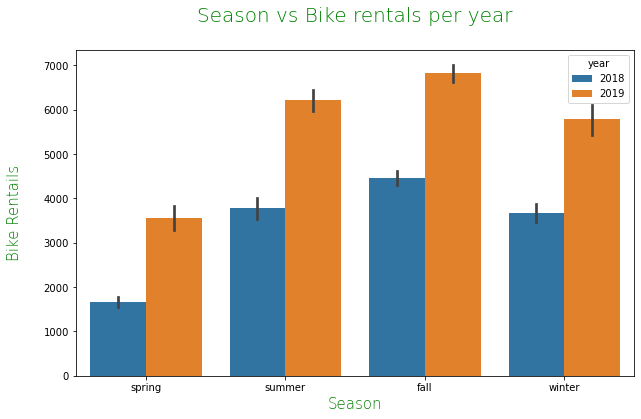

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike, x='season',y='count',hue='year')

plt.title('Season vs Bike rentals per year\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Season', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

#### >>> Fall have the most and Spring has the least bookings

### Months

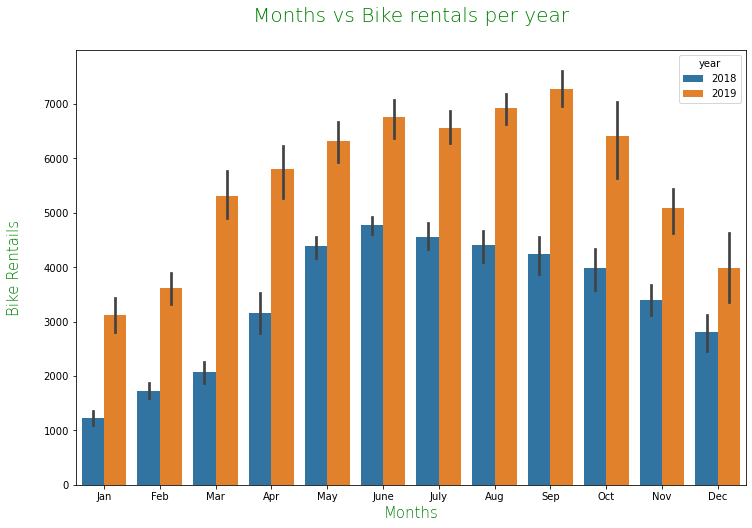

In [13]:
## Month vs Count

plt.figure(figsize=(12,8))
sns.barplot(data=bike, x='month',y='count',hue='year')

plt.title('Months vs Bike rentals per year\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Months', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

#### >>> Sep have the most and Jan has the least bookings

### Weekdays

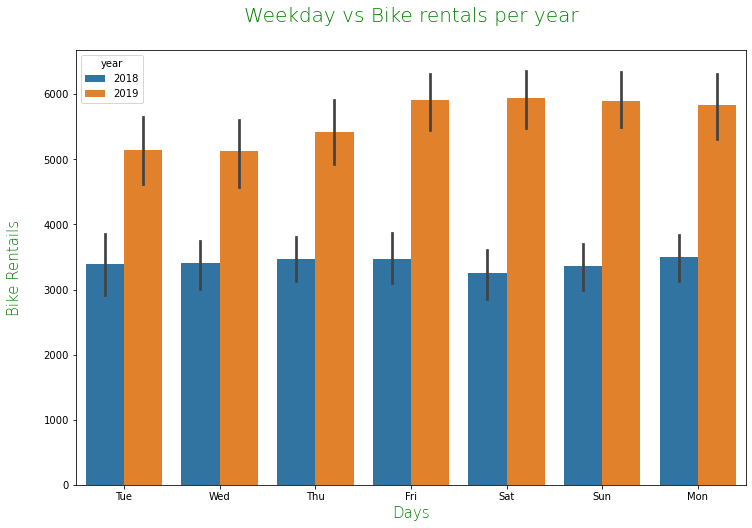

In [14]:
## Weekdays vs Count

plt.figure(figsize=(12,8))
sns.barplot(data=bike, x='weekday',y='count',hue='year')

plt.title('Weekday vs Bike rentals per year\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Days', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

#### >>> Not so clear that which days have more bookings - 2018- Sat had least and 2019 Wed has leat bookings. Let's check further


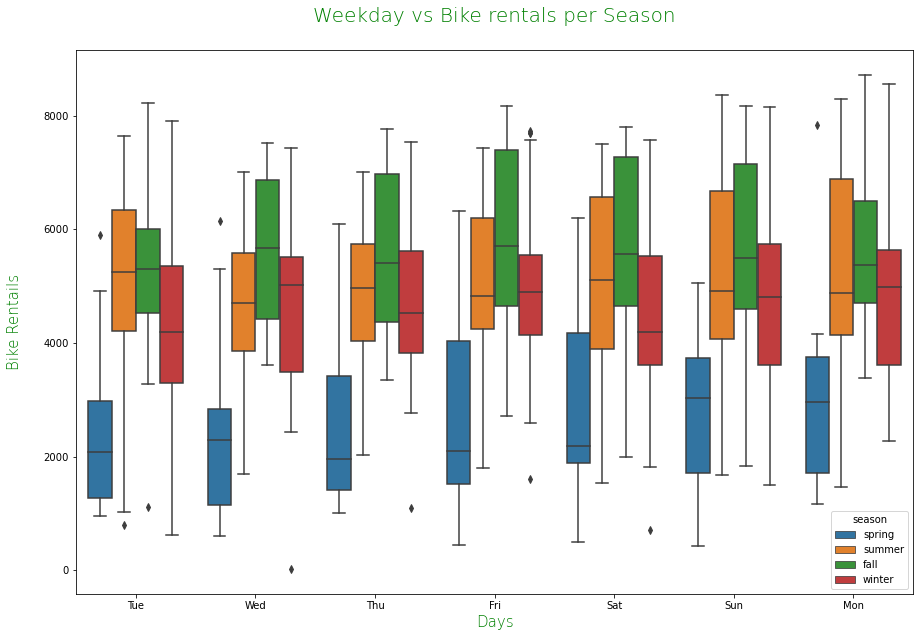

In [15]:
#Let'scheck weekly data per season

plt.figure(figsize=(15,10))
sns.boxplot(data=bike,x='weekday',y='count',hue='season')

plt.title('Weekday vs Bike rentals per Season\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Days', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

In [16]:
bike.groupby('weekday').mean().sort_values('count',ascending=False)

,year,feeling_temp,humidity,windspeed,count
weekday,,,,,
Fri,2018.500000,24.231104,62.853761,12.352284,4691.567308
Mon,2018.500000,23.486379,61.537441,12.824540,4665.721154
Sun,2018.500000,23.851713,61.563714,12.794083,4626.692308
Sat,2018.500000,24.254741,63.766567,12.742343,4597.423077
Thu,2018.500000,23.827068,63.451637,12.670264,4444.961538
Wed,2018.504762,23.371891,63.644796,12.921237,4274.495238
Tue,2018.495238,23.071064,62.532090,13.036447,4259.819048


#### >>> Fall has the most bookings

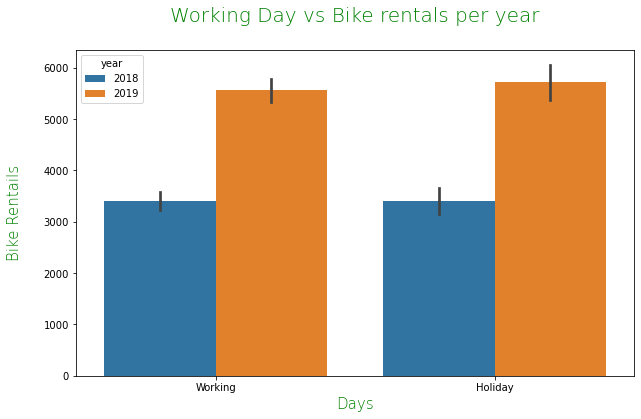

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike, x='workingday',y='count',hue='year')

plt.title('Working Day vs Bike rentals per year\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Days', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

#### >>> Days and Holidays doesn't seems to have much of impcat on bookings, From above we can colculde that Fridays have the most and Tuesday have the least bookings. and Holidays and Working days also have minimal impcat on bookings. Let's check further for othe variables

### Whether Situations

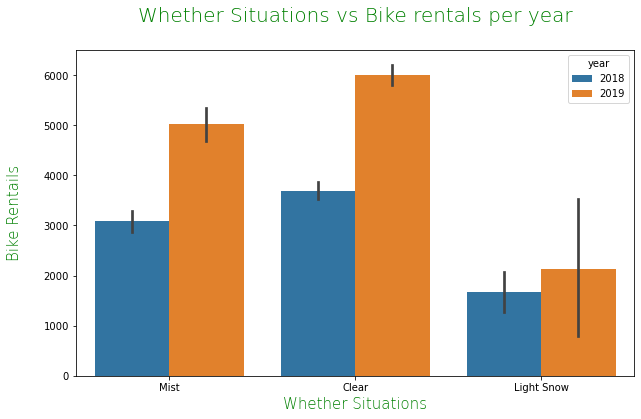

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=bike, x='weather_situation',y='count',hue='year')

plt.title('Whether Situations vs Bike rentals per year\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Whether Situations', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

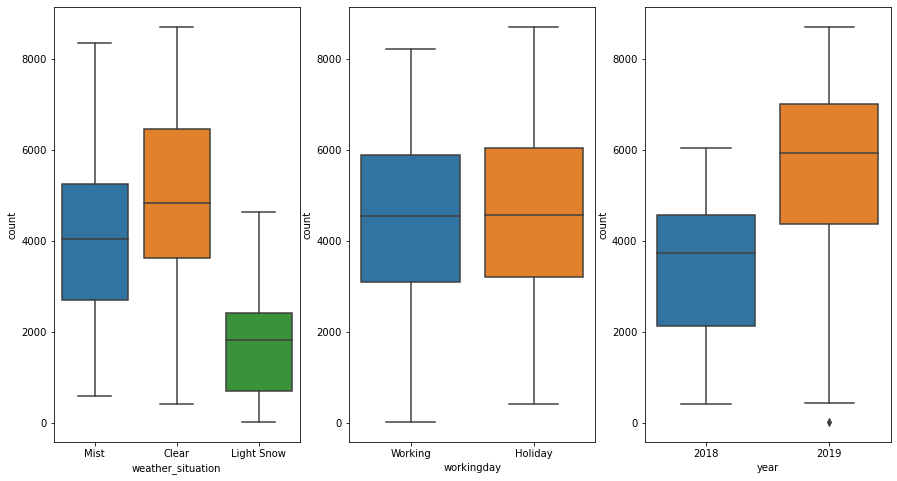

In [19]:
#plt.gcf().set_size_inches(12,8)
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.boxplot(x='weather_situation',y='count',data=bike)

plt.subplot(1,3,2)
sns.boxplot(x='workingday',y='count',data=bike)

plt.subplot(1,3,3)
sns.boxplot(x='year',y='count',data=bike)

plt.show()

#### Clear whether has the most bookings | 2019 is better compared to 2018


### Temp Humidity and Windspeed

In [20]:
bike.columns

Index(['date', 'season', 'year', 'month', 'weekday', 'workingday',
       'weather_situation', 'feeling_temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

#### Temp Humidity and Windspeed for Seasons

In [21]:
bike[['season','weather_situation', 'feeling_temp', 'humidity', 'windspeed']].groupby('season').mean()

,feeling_temp,humidity,windspeed
season,,,
fall,32.794920,63.348206,11.530366
spring,14.831376,58.167024,14.387168
summer,26.015366,62.694833,13.634978
winter,20.776937,66.871917,11.523637


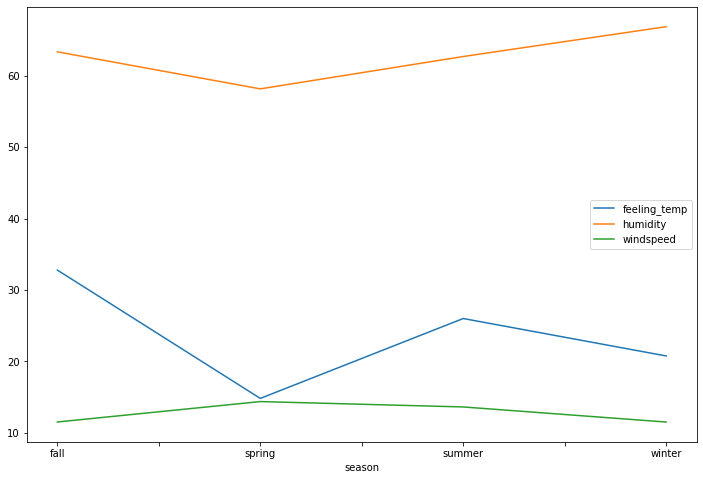

In [22]:
bike[['season','weather_situation', 'feeling_temp', 'humidity', 'windspeed']].groupby('season').mean().plot()
plt.gcf().set_size_inches(12,8)
plt.show()

#### >>> As seen above, Fall and Summer has the most bookings and Spring has the least, from the above plot we can say that in Spring the Temperature drops and Wins speed alsi increases, so the bike bookings are low in Spring. So the feeling temperature seems to be a critical variable here, because Humidity and Wind speed doesn't seems to have that much of variance.



### Temperature vs Count

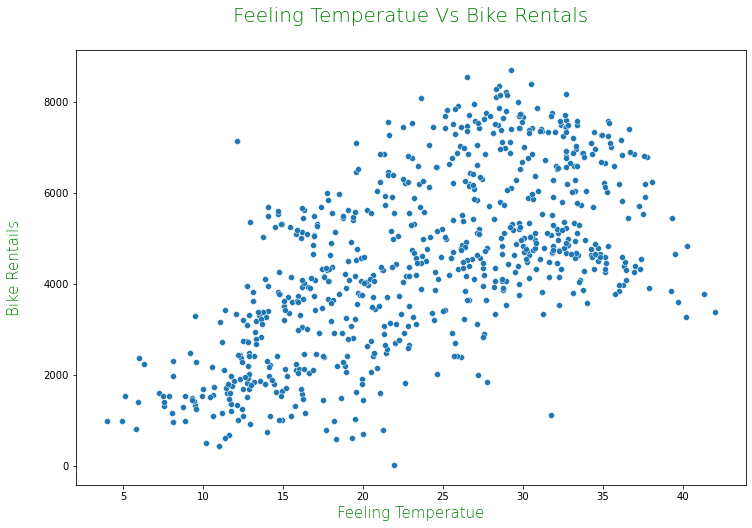

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=bike, x='feeling_temp',y='count')

plt.title('Feeling Temperatue Vs Bike Rentals\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Feeling Temperatue', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

In [24]:
bike[['humidity','windspeed','feeling_temp','count']].corr()

,humidity,windspeed,feeling_temp,count
humidity,1.000000,-0.248506,0.141512,-0.098543
windspeed,-0.248506,1.000000,-0.183876,-0.235132
feeling_temp,0.141512,-0.183876,1.000000,0.630685
count,-0.098543,-0.235132,0.630685,1.000000


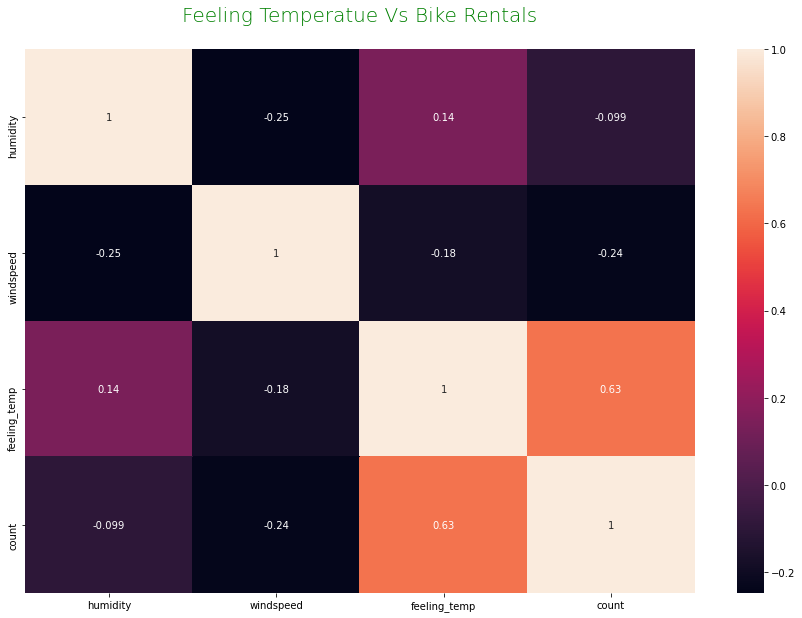

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(bike[['humidity','windspeed','feeling_temp','count']].corr(),annot=True)

plt.title('Feeling Temperatue Vs Bike Rentals\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.show()


#### >>>Clearly feeling temperature is strongly correlated to the bike rentals 

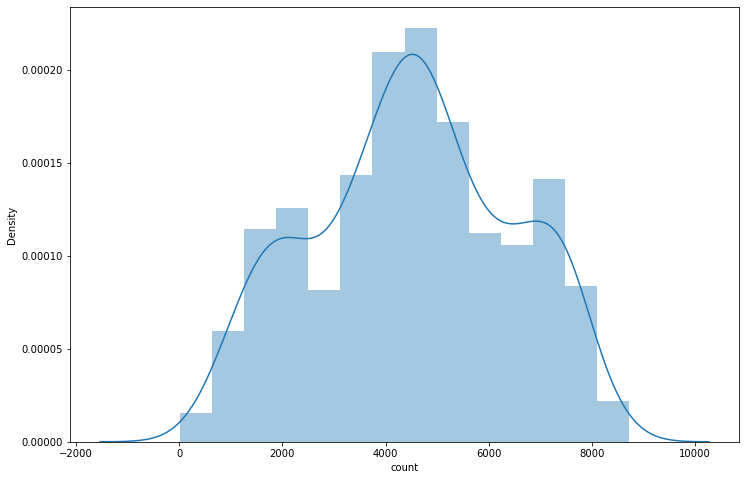

In [26]:
plt.figure(figsize=(12,8))
sns.distplot(bike['count'])
plt.show()

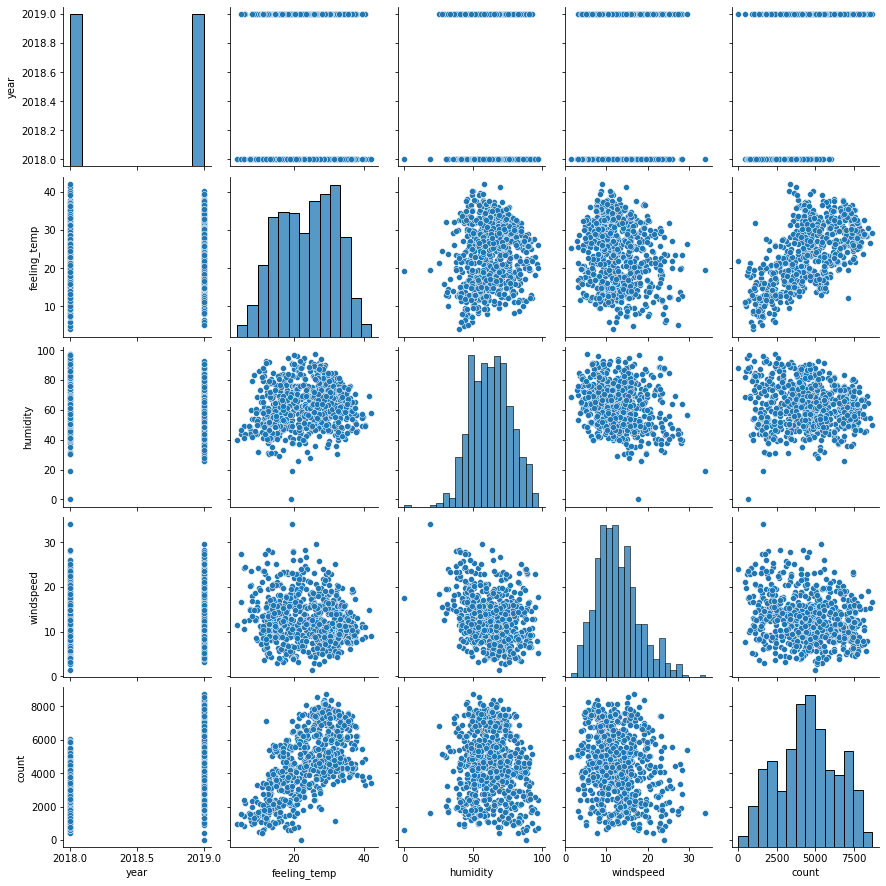

In [27]:
sns.pairplot(bike)

### Model Building
#### Catagorical variables

In [59]:
bike.columns

Index(['year', 'feeling_temp', 'humidity', 'windspeed', 'count', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow', 'Mist', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Working'],
      dtype='object')

In [28]:
#creating dummy variables
season_dm = pd.get_dummies(bike['season'],drop_first=True)
month_dm= pd.get_dummies(bike['month'],drop_first=True)
weather_dm= pd.get_dummies(bike['weather_situation'],drop_first=True)
weekday_dm= pd.get_dummies(bike['weekday'],drop_first=True)
workingday_dm = pd.get_dummies(bike['workingday'],drop_first=True)

In [29]:
bike= pd.concat([bike,season_dm,month_dm,weather_dm,weekday_dm,workingday_dm],axis=1)
bike.head()

,date,season,year,month,weekday,workingday,weather_situation,feeling_temp,humidity,windspeed,...,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Working
0,01-01-2018,spring,2018,Jan,Tue,Working,Mist,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,1,0,1
1,02-01-2018,spring,2018,Jan,Wed,Working,Mist,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,1,1
2,03-01-2018,spring,2018,Jan,Thu,Working,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,1,0,0,1
3,04-01-2018,spring,2018,Jan,Fri,Working,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,1
4,05-01-2018,spring,2018,Jan,Sat,Working,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,1


In [30]:
#drop catagorical varibales as dummies are created
bike.drop(['season','month','weather_situation','weekday','month','workingday'],axis=1,inplace=True)
bike.drop(['date'],axis=1,inplace=True) # not used 
bike.head()

,year,feeling_temp,humidity,windspeed,count,spring,summer,winter,Aug,Dec,...,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Working
0,2018,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,2018,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2018,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2018,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2018,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Splitting data into Training and Testing Sets

In [31]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100) #splitting in 70% traning and rest testing

In [32]:
bike.columns

Index(['year', 'feeling_temp', 'humidity', 'windspeed', 'count', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow', 'Mist', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Working'],
      dtype='object')

In [33]:
# Rescaling features
scaler= StandardScaler()

num_vars=['feeling_temp','humidity','windspeed','count']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

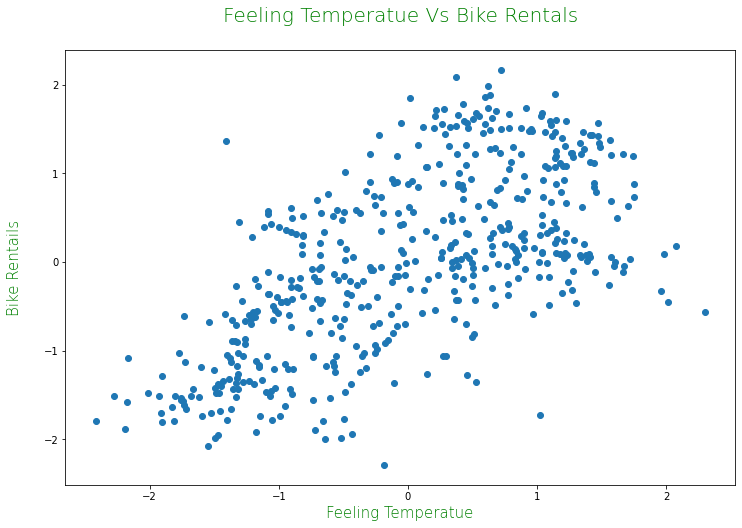

In [34]:
plt.figure(figsize=(12,8))
plt.scatter('feeling_temp','count',data=df_train)

plt.title('Feeling Temperatue Vs Bike Rentals\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('Feeling Temperatue', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Bike Rentails\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

In [35]:
y_train = df_train.pop('count')
X_train = df_train

In [36]:
X_train.head()

,year,feeling_temp,humidity,windspeed,spring,summer,winter,Aug,Dec,Feb,...,Sep,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Working
653,2019,-0.055878,-0.514725,-0.117752,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
576,2019,1.194106,0.516433,-0.330615,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,2019,-0.348834,-0.069854,-0.385694,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
728,2019,-1.473492,-1.045032,2.018143,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
482,2019,-0.571474,-1.000840,-0.779889,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


### Linear model creation

#### Using RFE for automated Feature selection

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('feeling_temp', True, 1),
 ('humidity', False, 13),
 ('windspeed', False, 10),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', False, 4),
 ('July', False, 14),
 ('June', False, 8),
 ('Mar', False, 18),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 17),
 ('Sun', True, 1),
 ('Thu', False, 15),
 ('Tue', False, 12),
 ('Wed', False, 11),
 ('Working', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'feeling_temp', 'spring', 'winter', 'Sep', 'Light Snow', 'Mist',
       'Mon', 'Sun', 'Working'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
X_train_rfe = sm.add_constant(X_train_rfe) #addding constant

In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.45e-177
Time:                        22:09:16   Log-Likelihood:                -289.85
No. Observations:                 510   AIC:                             601.7
Df Residuals:                     499   BIC:                             648.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2121.3177     77.856    -27.247      0.000   -2274.285   -1968.351
year             1.0508      0.039     27.245      0.000       0.975       1.127
feeling_temp     0.4251      0.029     14.462      0.000       0.367       0.483
spring          -0.5322      0.070     -7.599      0.000      -0.670      -0.395
winter           0.2149      0.056      3.827      0.000       0.105       0.325
Sep              0.3425      0.072      4.729      0.000       0.200       0.485
Light Snow      -1.3149      0.116    -11.381      0.000      -1.542      -1.088
Mist            -0.3500      0.041     -8.514      0.000      -0.431      -0.269
Mon              0.4555      0.141      3.231      0.001       0.179       0.732
Sun              0.4602      0.142      3.250      0.001       0.182       0.738
Working          0.3661      0.133      2.751      0.006       0.105       0.628
==============================================================================
Omnibus:                       77.115   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.070
Skew:                          -0.772   Prob(JB):                     1.96e-42
Kurtosis:                       5.580   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### >>>p- value is <0.05 for all variables

In [43]:
X_train_new= X_train_rfe.drop('const',axis=1)

#### VIF

In [44]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,50.83
9,Working,34.46
7,Mon,7.46
8,Sun,7.09
2,spring,3.26
1,feeling_temp,2.34
3,winter,2.15
6,Mist,1.59
4,Sep,1.15
5,Light Snow,1.07


#### >>> Year,Working,Mon and Sun have VIF>5 - should be a convern for re-analysis of model

#### Residual analysis


In [45]:
y_train_pred = lm.predict(X_train_rfe)

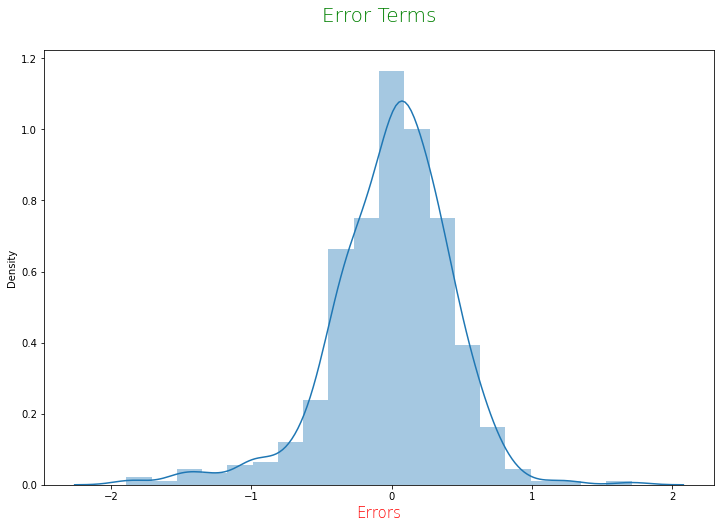

In [46]:
plt.figure(figsize=(12,8))
sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Errors', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Red'})
plt.show()

In [47]:
df_test.columns

Index(['year', 'feeling_temp', 'humidity', 'windspeed', 'count', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light Snow', 'Mist', 'Mon', 'Sat', 'Sun',
       'Thu', 'Tue', 'Wed', 'Working'],
      dtype='object')

In [48]:
## Predictions

In [50]:
num_vars=['feeling_temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [51]:
y_test = df_test.pop('count')
X_test = df_test

In [52]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [54]:
y_test_pred = lm.predict(X_test_new) #making predictions

In [55]:
## Model evaluation

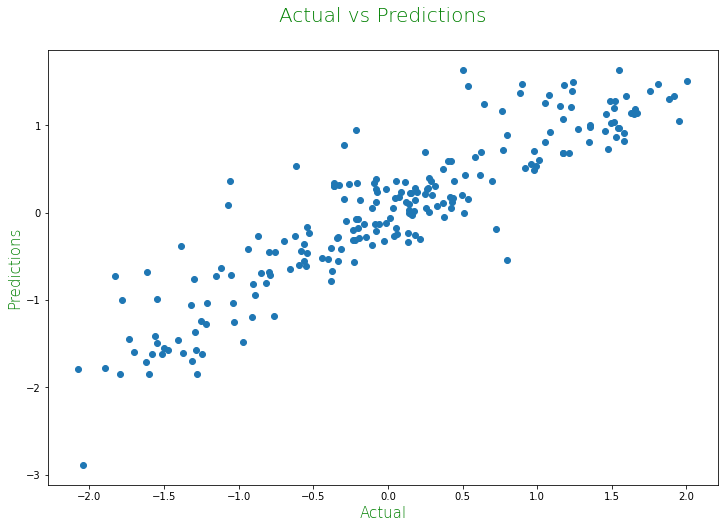

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_test_pred)

plt.title('Actual vs Predictions\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Actual', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Predictions', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.show()

In [58]:
r2_score(y_test, y_test_pred)

0.8123205180795029

#### Conclusion - Following varibales are affecting the bike rental bookings - 
    - Light Snow	-1.3149
    - Mist	-0.3500
    - spring	-0.5322
    - feeling_temp	0.4251
    - Sun	0.4602


Thanks,
Kishor Kunal |
DS27 | kishorkunal21@gmail.com